### Set parameters and names

In [1]:
from CustomObjects import *
%matplotlib inline
# plot images in retina
%config InlineBackend.figure_format = 'retina'
INPUT_GENES    = 'ALL'
INPUT_FEATURES = 'X_FC'
INPUT_NORM     = 'z'
CODINGS_SIZE = 6

ID     = f'{CODINGS_SIZE}D_{INPUT_GENES}_{INPUT_FEATURES}_{INPUT_NORM}'

DIR_FIG  = f'../figures/{ID}_analysis/'
DIR_DATA = f'../data/{ID}_analysis/'
! mkdir -p {DIR_FIG}
! mkdir -p {DIR_DATA}
# set colors
my_cmap='magma'
#
SAVE_JPG=True



## Import original (No Z-score norm.)

In [2]:
RNA = pd.read_csv(f'../data/matrices/RNA_FPKM_TSS_2500_FILT.csv').set_index('GENE')
RNA_CV = RNA.std(axis=1) / RNA.mean(axis=1)

ALL_X = pd.read_csv(f'../data/matrices/ALL/ALL_X.csv').set_index('GENE')
#ALL_X = calculate_mean_features(ALL_X, PREFIXES)
ALL_FC = pd.read_csv(f'../data/matrices/ALL/ALL_FC.csv').set_index('GENE')
assert (ALL_X.index == ALL_FC.index).all()
ORIGINAL = pd.concat([ALL_X,ALL_FC],axis=1)
ORIGINAL

,RNA_ESC_1,RNA_ESC_2,RNA_MES_1,RNA_MES_2,RNA_CP_1,RNA_CP_2,RNA_CM_1,RNA_CM_2,H3K27ac_ESC_1,H3K27ac_ESC_2,...,H3K4me3_CP_1,H3K4me3_CP_2,H3K4me3_CM_1,H3K4me3_CM_2,RNA_CM_CP_FC,RNA_CM_MES_FC,RNA_CM_ESC_FC,RNA_CP_MES_FC,RNA_CP_ESC_FC,RNA_MES_ESC_FC
GENE,,,,,,,,,,,,,,,,,,,,,
0610005C13Rik,0.523556,0.523381,0.324007,0.375014,0.509199,0.508413,0.380628,0.340873,0.593135,0.379820,...,-0.199055,-0.286696,-0.169660,-0.521653,-0.783957,0.063181,-0.901347,0.910119,-0.030741,-0.922413
0610010F05Rik,0.626043,0.588225,0.529627,0.624664,0.528783,0.641978,0.406563,0.559040,0.574714,0.254966,...,1.078188,1.048438,0.900563,0.810423,-0.491349,-0.460136,-0.641207,0.094366,-0.062699,-0.137794
0610010K14Rik,1.716762,1.738602,1.813562,1.843787,1.659951,1.657205,1.593923,1.565807,1.028947,0.686395,...,1.476951,1.401009,1.256328,1.039914,-0.267927,-0.848115,-0.549874,-0.517051,-0.194858,0.341132
0610012G03Rik,1.260547,1.288517,1.422196,1.429950,1.359346,1.399710,1.735214,1.666073,0.836791,0.560050,...,1.493365,1.387667,1.199445,1.111087,1.099101,0.933497,1.418041,-0.102511,0.405313,0.527319
0610030E20Rik,0.594385,0.577639,0.886413,0.823299,0.815198,0.797472,0.887769,0.971334,0.740202,0.449267,...,1.015507,0.930157,0.873669,0.762349,0.473082,0.279615,1.344226,-0.130283,0.959460,1.110120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zyg11b,0.739701,0.729356,1.082301,1.078726,0.849525,0.932906,0.893598,0.960540,0.597286,0.438992,...,1.274028,1.206427,0.959760,0.825830,0.136267,-0.571453,0.703111,-0.644431,0.653804,1.317960
Zyx,1.175020,1.192959,1.510156,1.442766,1.582583,1.563853,1.731059,1.519903,0.601842,0.250018,...,1.485722,1.321269,1.140736,0.981087,0.177368,0.504285,1.481901,0.389854,1.391211,1.021171
Zzef1,0.719601,0.725374,0.667084,0.577556,0.720893,0.718811,0.906529,0.843747,0.998606,0.778420,...,1.518419,1.389596,1.293899,1.194932,0.613942,1.024212,0.555655,0.473075,0.028574,-0.423839


Text(0.5, 1.0, 'CV on RNA-seq')

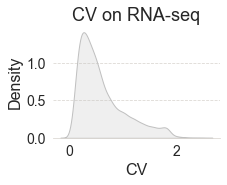

In [3]:
plt.figure(figsize=(3,2))
sns.kdeplot(RNA_CV, color='silver',fill=1).xaxis.grid(False)
sns.despine(left=1)
plt.xlabel('CV')
plt.title('CV on RNA-seq')


## Import original and reconstrution for all methods (AE,VAE,PCA,UMAP)(Z-score) 

In [4]:
DF   = pd.read_csv(f'../data/AE_{ID}/DF.csv').set_index('GENE')
assert DF.isna().any().sum() == 0
FEATURE_NAMES = DF.select_dtypes(include=['number']).columns
FEATURE_NAMES


Index(['RNA_ESC_1', 'RNA_ESC_2', 'RNA_MES_1', 'RNA_MES_2', 'RNA_CP_1',
       'RNA_CP_2', 'RNA_CM_1', 'RNA_CM_2', 'H3K27ac_ESC_1', 'H3K27ac_ESC_2',
       'H3K27ac_MES_1', 'H3K27ac_MES_2', 'H3K27ac_CP_1', 'H3K27ac_CP_2',
       'H3K27ac_CM_1', 'H3K27ac_CM_2', 'H3K27me3_ESC_2', 'H3K27me3_ESC_3',
       'H3K27me3_MES_1', 'H3K27me3_MES_2', 'H3K27me3_CP_1', 'H3K27me3_CP_2',
       'H3K27me3_CM_1', 'H3K27me3_CM_2', 'H3K4me3_ESC_1', 'H3K4me3_ESC_2',
       'H3K4me3_MES_1', 'H3K4me3_MES_2', 'H3K4me3_CP_1', 'H3K4me3_CP_2',
       'H3K4me3_CM_1', 'H3K4me3_CM_2', 'RNA_CM_CP_FC', 'RNA_CM_MES_FC',
       'RNA_CM_ESC_FC', 'RNA_CP_MES_FC', 'RNA_CP_ESC_FC', 'RNA_MES_ESC_FC'],
      dtype='object')

In [5]:
METHODS = ['VAE','AE','PCA','UMAP']
CODE = calculate_mean_features(DF.filter(regex='^(?!.*FC).*$'), PREFIXES)
assert (ORIGINAL.index == CODE.index).all()                                      # check index
CODE = pd.concat((CODE, ORIGINAL.filter(regex='FC')), axis=1)
ERR = pd.DataFrame()
for METHOD in METHODS:
    TMP = pd.read_csv(f'../data/{METHOD}_{ID}/R_DF_WHOLE.csv').set_index('GENE')
    assert (DF.index == TMP.index).all()                                    # check index
    assert TMP.isna().any().sum() == 0                                      # check NaN
    TMP_ERR = TMP.filter(regex='Sc|RMSE').add_prefix(f'{METHOD}_')
    TMP  = TMP.filter(regex=METHOD)
    CODE = pd.concat((TMP,CODE,TMP_ERR),axis=1)
    # 
    DIR_FIG_METHOD = f'{DIR_FIG}{METHOD}/'
    ! mkdir -p {DIR_FIG_METHOD}
CODE['RNA_CV'] = RNA_CV

['H3K4me3_ESC_1', 'H3K4me3_ESC_2'] -> H3K4me3_ESC COLUMNS 
['H3K4me3_MES_1', 'H3K4me3_MES_2'] -> H3K4me3_MES COLUMNS 
['H3K4me3_CP_1', 'H3K4me3_CP_2'] -> H3K4me3_CP COLUMNS 
['H3K4me3_CM_1', 'H3K4me3_CM_2'] -> H3K4me3_CM COLUMNS 
['H3K27ac_ESC_1', 'H3K27ac_ESC_2'] -> H3K27ac_ESC COLUMNS 
['H3K27ac_MES_1', 'H3K27ac_MES_2'] -> H3K27ac_MES COLUMNS 
['H3K27ac_CP_1', 'H3K27ac_CP_2'] -> H3K27ac_CP COLUMNS 
['H3K27ac_CM_1', 'H3K27ac_CM_2'] -> H3K27ac_CM COLUMNS 
['H3K27me3_ESC_2', 'H3K27me3_ESC_3'] -> H3K27me3_ESC COLUMNS 
['H3K27me3_MES_1', 'H3K27me3_MES_2'] -> H3K27me3_MES COLUMNS 
['H3K27me3_CP_1', 'H3K27me3_CP_2'] -> H3K27me3_CP COLUMNS 
['H3K27me3_CM_1', 'H3K27me3_CM_2'] -> H3K27me3_CM COLUMNS 
['RNA_ESC_1', 'RNA_ESC_2'] -> RNA_ESC COLUMNS 
['RNA_MES_1', 'RNA_MES_2'] -> RNA_MES COLUMNS 
['RNA_CP_1', 'RNA_CP_2'] -> RNA_CP COLUMNS 
['RNA_CM_1', 'RNA_CM_2'] -> RNA_CM COLUMNS 


### Compare methods by reconstruction error (gene-wise)

In [6]:
METHODS

['VAE', 'AE', 'PCA', 'UMAP']

VAE vs AE: 0.0
VAE vs PCA: 0.0
VAE vs UMAP: 0.0
AE vs PCA: 1.1500843580777506e-15
AE vs UMAP: 0.0
PCA vs UMAP: 0.0


<Figure size 216x57.6 with 0 Axes>

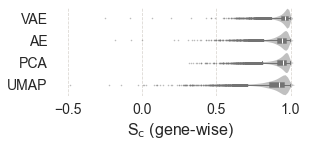

In [7]:
c= subscript_get('c')
FILT = CODE.filter(regex='Sc')
FILT.columns = FILT.columns.str.replace('_Sc', '', regex=False)
violins(FILT,COL_DICT={'':'silver'},SAVEFIG=f'{DIR_FIG}Sc.png',X_LAB=f'S{c} (gene-wise)',WIDTH_FACTOR=1.5,DPI=300)
from scipy.stats import wilcoxon
import itertools

combinations = list(itertools.combinations(METHODS, 2))
# Print the combinations
for combo in combinations:
    p = wilcoxon(FILT[combo[0]],FILT[combo[1]]).pvalue
    print(f'{combo[0]} vs {combo[1]}: {p}')


VAE vs AE: 0.0
VAE vs PCA: 0.0
VAE vs UMAP: 0.0
AE vs PCA: 1.656595384718813e-93
AE vs UMAP: 0.0
PCA vs UMAP: 0.0


<Figure size 216x57.6 with 0 Axes>

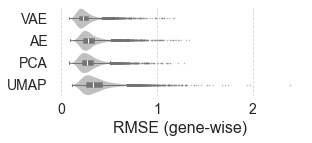

In [8]:

FILT = CODE.filter(regex='RMSE')
FILT.columns = FILT.columns.str.replace('_RMSE', '', regex=False)
violins(FILT,COL_DICT={'':'silver'},SAVEFIG=f'{DIR_FIG}RMSE.png',X_LAB='RMSE (gene-wise)',WIDTH_FACTOR=1.5,DPI=300)
for combo in combinations:
    p = wilcoxon(FILT[combo[0]],FILT[combo[1]]).pvalue
    print(f'{combo[0]} vs {combo[1]}: {p}')

### Get UMAP 2D for each Method 

In [12]:
METHODS = ['VAE']
for METHOD in METHODS:
    CODE = method_umap2D(CODE, METHOD)

/Users/marius/miniconda3/envs/DL/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


### Save data

In [13]:
CODE.to_csv(f'{DIR_DATA}CODE.csv')

### Color the latent space by categories 

In [14]:
GENE_SETS.keys()



dict_keys(['Hedgehog Signaling Pathway WP116', 'ESC Pluripotency Pathways WP339', 'Wnt Signaling Pathway WP403', 'Early Mesodermal Lineage Markers', 'Heart Development WP2067', 'Neural Crest Differentiation WP2074', 'Striated Muscle Contraction WP216', 'Delta-Notch Signaling Pathway WP265'])

In [15]:
GS_COL_DICT = assign_palette('rainbow', GENE_SETS)

In [41]:
#                 NAME                     GROUP_DICT          COL_DICT
CATEGORIES = [  ['Cell type Marker genes', MARKER_GENES_EXT,   CT_COL_DICT ],
                ['MES_ESC_FC_25_Morey',    ESC_MES_FC25_Morey, {'ESC_MES_FC25_Morey':CT_COL_DICT['MES']}], 
                ['Gonzalez annotation',    GONZALEZ,           GONZALEZ_COL_DICT]  
                ]     
                
import random
random.seed(42)
# Function to generate a random hex color code
def random_color():
    return "#{:06x}".format(random.randint(0, 0xFFFFFF))
# Adding new categories to CATEGORIES
for key, gene_list in GENE_SETS.items():
    CATEGORIES.append([key, {key: gene_list}, {key: GS_COL_DICT[key]}])
# Printing the updated CATEGORIES list
for category in CATEGORIES:
    print(category[0])

Cell type Marker genes
MES_ESC_FC_25_Morey
Gonzalez annotation
Hedgehog Signaling Pathway WP116
ESC Pluripotency Pathways WP339
Wnt Signaling Pathway WP403
Early Mesodermal Lineage Markers
Heart Development WP2067
Neural Crest Differentiation WP2074
Striated Muscle Contraction WP216
Delta-Notch Signaling Pathway WP265


In [ ]:
#for CAT in CATEGORIES:
#    NAME, GROUP_DICT, COL_DICT = CAT
#    export_legend(COL_DICT, filename= f'{DIR_FIG}legend_{NAME}.pdf', MK_SIZE=9)

for METHOD in METHODS:
    for CAT in CATEGORIES:
        NAME, GROUP_DICT, COL_DICT = CAT
        if NAME =='Gonzalez annotation': SIZE,MARKER = 10,'o'
        else: SIZE,MARKER = 70,'X'
        umap_2d_discrete(CODE, METHOD, GROUP_DICT, NAME, f'{DIR_FIG}{METHOD}/', COL_DICT=COL_DICT, 
                            SIZE=SIZE,MARKER=MARKER)


### Color by continous values

In [ ]:
for METHOD in METHODS:
    umap_2d_continuous(CODE, METHOD, f'RNA_CV',  f'{DIR_FIG}{METHOD}/' , SIZE=4, COLORMAP='Spectral_r',
                        PERCENTILES=[1,99])
    umap_2d_continuous(CODE, METHOD, f'{METHOD}_Sc',  f'{DIR_FIG}{METHOD}/' , SIZE=4, COLORMAP='Spectral',
                        PERCENTILES=[1,99])
    umap_2d_continuous(CODE, METHOD, f'{METHOD}_RMSE',  f'{DIR_FIG}{METHOD}/' , SIZE=4, COLORMAP='Spectral_r',
                        PERCENTILES=[1,99])

---

In [ ]:
FEATURES_COLORMAP_DICT = {'H3K4me3':'Oranges','H3K27ac':'Purples','H3K27me3':'Blues','RNA':'Reds'} 

for METHOD in METHODS:
    umap_2d_continuous_grid(CODE, METHOD, PREFIXES, f'{DIR_FIG}{METHOD}/' ,NAME='Features_AVG', SIZE=4, 
                                COLORMAP_DICT=FEATURES_COLORMAP_DICT, 
                                PERCENTILES=[1,99])


#### FCs

In [ ]:
FC_FEATURES = ['RNA_CM_CP_FC','RNA_CM_ESC_FC','RNA_CM_MES_FC','RNA_CP_MES_FC','RNA_CP_ESC_FC','RNA_MES_ESC_FC']

for METHOD in METHODS:
    umap_2d_continuous_grid(CODE, METHOD, FC_FEATURES, f'{DIR_FIG}{METHOD}/' ,NAME='FCs', SIZE=4, 
                            COLORMAP='RdBu_r', PERCENTILES=[1,99], 
                            CENTER=True)
